In [2]:
!pip install -e .. 

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/jesus/git/SimulatorEngine
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ssl-simulator
    Found existing installation: ssl-simulator 0.1
    Uninstalling ssl-simulator-0.1:
      Successfully uninstalled ssl-simulator-0.1
  DEPRECATION: Legacy editable install of ssl-simulator==0.1 from file:///home/jesus/git/SimulatorEngine (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for ssl-simulator

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: p

In [1]:
# Import standard libraries
import os

# Third-Party Libraries
import numpy as np

# Import the Swarm Systems Lab Simulator
import ssl_simulator
from ssl_simulator.data_manager import load_sim

from ssl_simulator.visualization import set_paper_parameters
set_paper_parameters(fontsize=15)

# Import custom functions and classes
from visualization import PlotBasic
from controllers import Oscillator

# Define constants for file paths
OUTPUT_DIR = os.path.join("..", "output")
SIMDATA_FILE = os.path.join(OUTPUT_DIR, "data.csv")

# SI following an oscillatory motion

## Launch the simulation

In [2]:
# Define the initial state
N = 5

p = np.ones((N,2))
x0 = [p]

# Controller settings
speed_fixed = 1.4
A_max = 2
omega_fixed = np.pi/4

speed = np.ones(N) * speed_fixed
A = (np.arange(N)+1)/(N+1) * A_max
omega = np.ones(N) * omega_fixed

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = ssl_simulator.robot_models.SingleIntegrator(x0)
controller = Oscillator(A, omega, speed)

# Then, construct the Simulator Engine
dt = 0.01
simulator = ssl_simulator.SimulationEngine(robot_model, controller, time_step=dt)

# --------------------------------
# Run the simulation and save data
tf = 2*np.pi/np.max(omega)

simulator.run(tf)
simulator.logger.save(SIMDATA_FILE)
# --------------------------------

Running simulation: 100%|██████████| 800/800 [00:00<00:00, 6678.70it/s]


time:  (801,)
p:  (801, 5, 2)
p_dot:  (801, 5, 2)
u:  (801, 5, 2)
A_gamma:  (801, 5)
omega_gamma:  (801, 5)
speed:  (801, 5)
gamma:  (801, 5)


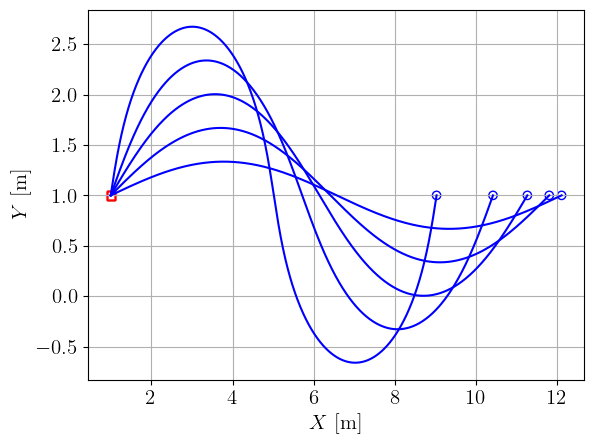

In [8]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasic(simulation_data)

# Generate and display the plot
plotter.plot()